# Transformers for Non-NLP Tasks with PyTorch and Hugging Face

Transformers have revolutionized the field of natural language processing (NLP). However, their application extends beyond NLP to areas such as computer vision, time series analysis, and more. This tutorial explores how to use transformers for non-NLP tasks using PyTorch and Hugging Face's transformers library.

## Prerequisites
Before we begin, ensure you have a Google Colab notebook or a similar environment set up. We'll use Python 3.x, PyTorch, and Hugging Face's transformers library.

## Installation
Start by installing the necessary libraries. Run the following commands in your notebook:

In [1]:
!pip install -q torch torchvision torchaudio
!pip install -q transformers

## Importing Libraries
After installation, import the required libraries:

In [2]:
import torch
import transformers
from torch import nn
from torchvision import models, transforms
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


## Checking Package Versions
To ensure reproducibility, let's check the version of the installed packages:

In [3]:
print(f"PyTorch Version: {torch.__version__}")
print(f"Transformers Version: {transformers.__version__}")


PyTorch Version: 2.1.0+cu121
Transformers Version: 4.38.1


## Conceptual Overview
Transformers are models that leverage self-attention mechanisms to process input data in parallel, significantly improving efficiency and performance in various tasks. While originally designed for NLP, the adaptability of transformers allows them to excel in other domains, such as image classification (ViT - Vision Transformer) and time series forecasting.

## Vision Transformers (ViT)
Vision Transformers (ViT) apply transformer architecture to image classification tasks. Unlike conventional CNNs that process images through local convolutions, ViT divides an image into patches and processes these patches as a sequence, allowing the model to capture global dependencies.

## Example: Image Classification with ViT
Let's dive into an example of using a Vision Transformer for image classification.

### Step 1: Load and Prepare an Image
First, we need to load an image and prepare it for the model. We'll use the ViTFeatureExtractor for this purpose.##

100%|██████████| 9912422/9912422 [00:00<00:00, 133849657.11it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 17850824.32it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 81122922.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17070366.28it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



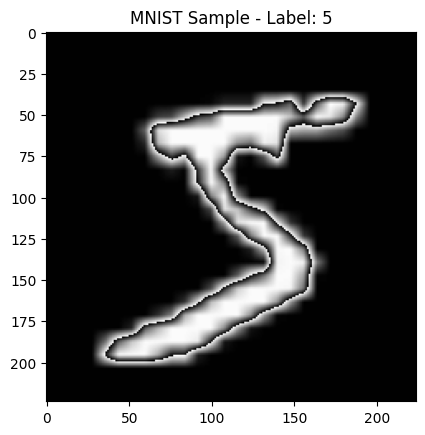

In [4]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define a transform to convert MNIST images to the format expected by ViT
transform = transforms.Compose([
    transforms.Resize(224),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Repeat the single channel image 3 times to create a 3-channel image
    transforms.Normalize(0.5, 0.5),  # Normalize the image
])

# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Select an image from the dataset
image, label = mnist_dataset[0]  # Change 0 to any other index to select a different image

# Since ViTFeatureExtractor expects a PIL Image, we convert the tensor back to a PIL Image for demonstration
image_for_vit = transforms.ToPILImage(mode='RGB')(image)

# Display the image
plt.imshow(image_for_vit)
plt.title(f"MNIST Sample - Label: {label}")
plt.show()

### Step 2: Feature Extraction

The ViTFeatureExtractor processes the image into the format expected by the transformer model.

In [5]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

inputs = feature_extractor(images=image_for_vit, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


### Step 3: Load the ViT Model

We load a pre-trained Vision Transformer model from Hugging Face's model hub.

In [6]:
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Step 4: Image Classification
Now, we can classify the image using the transformer model.

In [8]:
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
print(f"Predicted class: {model.config.id2label[predicted_class_idx]}")

Predicted class: LABEL_1


## Conclusion
In this tutorial, we've explored how transformers can be applied to non-NLP tasks, specifically image classification using Vision Transformers (ViT). The principles learned here can be extended to other domains such as time series analysis, where the sequential nature of transformers can be leveraged.

Remember, the field of AI and machine learning is rapidly evolving, and staying updated with the latest advancements is key to leveraging these powerful models effectively.